In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#change directory to save output here
directory = r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\Plots\RosslerExamples/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))

C:\Users\nickb\AppData\Local\Temp/ipykernel_6548/1448222240.py:10: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))


In [2]:
RQA_df = pd.read_csv(r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\rqa_data\RQA_Rossler_y-RQA-Parameters-true_0.02_max_3_2_4_2.csv")


In [3]:

print("- shape is", RQA_df.shape)

display(RQA_df)


- shape is (25100, 15)


,a,DIV,LAM,Vmax,VENTR,Lmax,MRT,NMPRT,RR,RTE,TT,L,ENTR,DET,TREND
0,0.30,0.003891,0.000000,0,NaN,257,44.676294,892,0.020425,1.172377,0.000000,65.800000,2.171571,0.912200,-0.019061
1,0.30,0.003891,0.000000,0,NaN,257,44.777112,888,0.020425,1.178569,0.000000,65.600000,2.079151,0.909427,-0.019769
2,0.30,0.003891,0.000000,0,NaN,257,44.569482,890,0.020425,1.171830,0.000000,65.800000,2.118649,0.912200,-0.020108
3,0.30,0.003891,0.000000,0,NaN,257,44.445172,885,0.020406,1.175427,0.000000,65.466667,1.898927,0.908418,-0.022051
4,0.30,0.003891,0.000000,0,NaN,257,44.602291,885,0.020406,1.178209,0.000000,65.466667,1.898927,0.908418,-0.022051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25095,0.55,0.029412,0.282002,5,0.447831,34,52.508014,109,0.019613,4.095970,2.154412,6.750000,2.401185,0.805582,0.024333
25096,0.55,0.020408,0.246908,3,0.247725,49,49.614058,169,0.019840,3.567998,2.067729,8.053571,2.595439,0.858230,0.005989
25097,0.55,0.031250,0.246356,6,0.752440,32,46.524205,232,0.019424,3.811100,2.336406,6.391608,2.461300,0.888241,0.001964
25098,0.55,0.016949,0.257737,4,0.731423,59,50.281926,142,0.019519,3.895217,2.348018,6.664062,2.393025,0.824952,-0.016217


In [4]:
#replace NaN values with 0
RQA_df=RQA_df.fillna(0)

#Rearranging columns into RR -> diagonal -> vertical -> recurrence time features
cols = ["a","RR","DET","L","Lmax","DIV","ENTR","TREND","LAM","TT","Vmax","VENTR","MRT","NMPRT","RTE"]
RQA_df=RQA_df[cols]
feature_set=RQA_df.loc[:, RQA_df.columns != 'a']
RQA_meanvals=RQA_df.groupby(np.arange(len(feature_set))//100).mean()

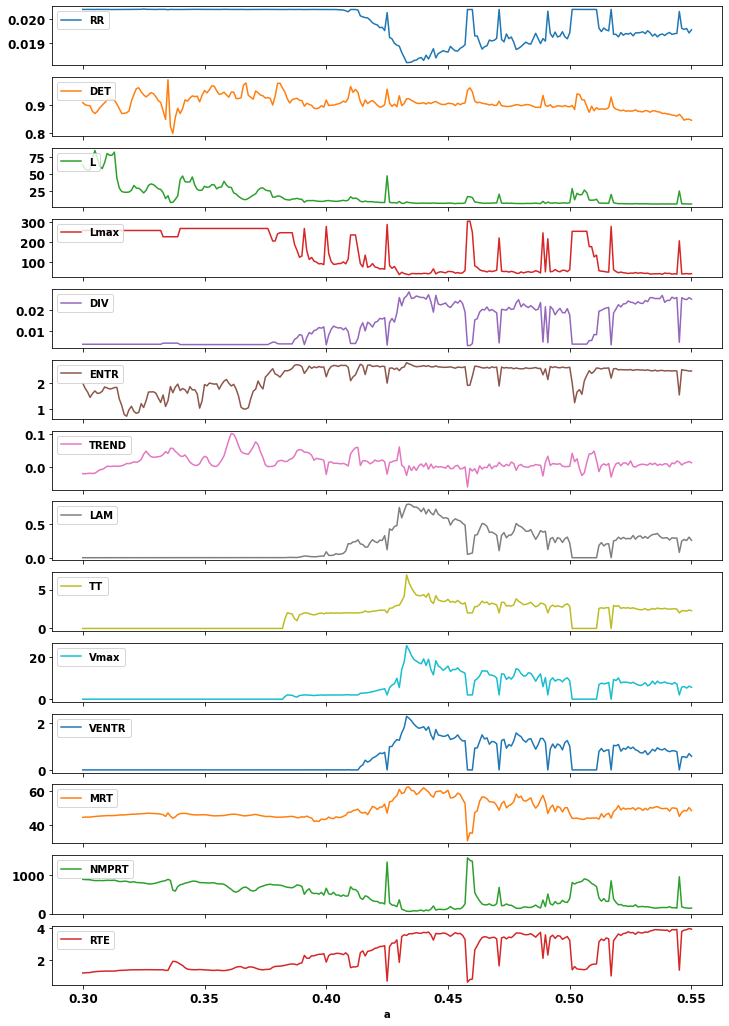

In [5]:
#MRT = Mean Recurrence Time
#NMPRT = Number for Most Probable Recurrence Time
#RTE = Recurrence Time Entropy

axes=RQA_meanvals.plot(x="a",subplots=True,figsize=(12,18),fontsize=12)
axes = axes.flat
fig = axes[0].get_figure()

for ax in axes:
    
    ax.legend(loc='upper left')


plt.savefig("RQA_Features_mean.pdf",format="pdf",bbox_inches="tight")
plt.show()

In [6]:
bifurcation = pd.read_csv(r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\rqa_data\Rossler_bifurcation_yn.csv")
b = pd.DataFrame(bifurcation).to_numpy()
print("- shape is", b.shape)


- shape is (2501, 194)


In [7]:
lyap = pd.read_csv(r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\rqa_data\Lyapunov.csv")


In [8]:
lyap2 = pd.DataFrame(lyap).to_numpy()


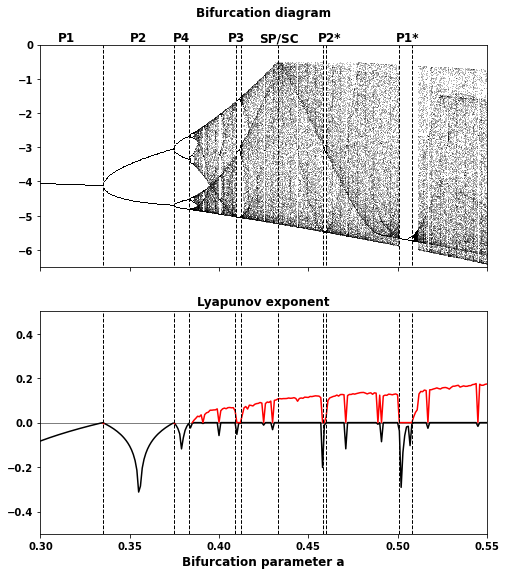

In [12]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
ax1.plot(b[0::5,0:1],b[::5,1:],',k',alpha=.25)
ax1.set_xlim(0.3,0.55)
ax1.set_ylim(-6.5,0)
ax1.set_title("Bifurcation diagram",y=1.1,fontsize=12)


ax2.axhline(0, color='k', lw=.5)
ax2.plot(lyap2[:,3],lyap2[:,1],color="k",ms=.5)
ax2.plot(lyap2[:,3][35],lyap2[:,0][35],color="r",marker="o",markersize=1)
ax2.plot(lyap2[:,3][75],lyap2[:,0][75],color="r",marker="o",markersize=1)
ax2.plot(lyap2[:,3][85:],lyap2[:,0][85:],color="r",ms=.5)
ax2.set_xlim(0.3,0.55)
ax2.set_ylim(-0.5,0.5)
ax2.set_title("Lyapunov exponent",fontsize=12)
ax2.set_xlabel("Bifurcation parameter a",fontsize=12)


#P1    
ax1.plot([0.3351,0.3351],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.31,0.1,"P1",fontsize=12)
ax2.plot([0.3351,0.3351],[-0.5,0.5],"k",linestyle="--",linewidth=1)


#P2
ax1.plot([0.3748,0.3748],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.35,0.1,"P2",fontsize=12)
ax2.plot([0.3748,0.3748],[-0.5,0.5],"k",linestyle="--",linewidth=1)

#P4
ax1.plot([0.383,0.383],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.374,0.1,"P4",fontsize=12)
ax2.plot([0.383,0.383],[-0.5,0.5],"k",linestyle="--",linewidth=1)

#P3
ax1.plot([0.4095,0.4095],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.405,0.1,"P3",fontsize=12)
ax1.plot([0.4125,0.4125],[-10,0],"k",linestyle="--",linewidth=1)

ax2.plot([0.409,0.409],[-0.5,0.5],"k",linestyle="--",linewidth=1)
ax2.plot([0.4125,0.4125],[-0.5,0.5],"k",linestyle="--",linewidth=1)

#SP -> SC 
ax1.plot([0.43295,0.43295],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.4225,0.1,"SP/SC",fontsize=12)
ax2.plot([0.43295,0.43295],[-0.5,0.5],"k",linestyle="--",linewidth=1)

#P2*
ax1.plot([0.458,0.458],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.4552,0.1,"P2*",fontsize=12)
ax1.plot([0.46,0.46],[-10,0],"k",linestyle="--",linewidth=1)

ax2.plot([0.458,0.458],[-0.5,0.5],"k",linestyle="--",linewidth=1)
ax2.plot([0.46,0.46],[-0.5,0.5],"k",linestyle="--",linewidth=1)


#P1*
ax1.plot([0.501,0.501],[-10,0],"k",linestyle="--",linewidth=1)
ax1.text(0.499,0.1,"P1*",fontsize=12)
ax1.plot([0.508,0.508],[-10,0],"k",linestyle="--",linewidth=1)

ax2.plot([0.501,0.501],[-0.5,0.5],"k",linestyle="--",linewidth=1)
ax2.plot([0.508,0.508],[-0.5,0.5],"k",linestyle="--",linewidth=1)


plt.savefig("Rossler_bifurcationdiagram.pdf",format="pdf",bbox_inches="tight")
plt.show()

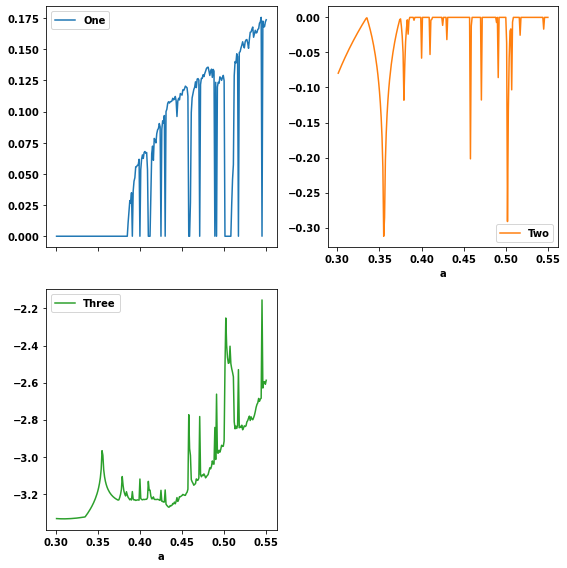

In [10]:

lyap.columns=['One',"Two","Three","a"]
cols_2 = ['One',"Two","Three"]
lyap.plot(x="a",y=cols_2,subplots=True,layout=(2,2),figsize=(8,8))

plt.tight_layout()
plt.show()